In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from scipy.io import readsav
import pprint

pp = pprint.PrettyPrinter(indent=4).pprint

In [2]:
%ls ../../sambuca/tests/data

_F1nm_H25_a_Non_UQ02_MB_RC__OS_SHon.sav  qbtest_output_spectra.hdr
noise_error_data.sav                     qbtest_output_spectra.lib
no_noise_error_data.sav                  sensor_filter_test_data.sav
qbtest_filter_350_900nm.hdr              test_error_noise.mat
qbtest_filter_350_900nm.lib              test_error_no_noise.mat
qbtest_input_spectra.hdr                 test_optimise_data.mat
qbtest_input_spectra.lib                 test_resample.mat


In [3]:
data = readsav('../../sambuca/tests/data/_F1nm_H25_a_Non_UQ02_MB_RC__OS_SHon.sav')

/usr/lib/python3.4/site-packages/scipy/io/idl.py:420: UserWarning: Skipping SYSTEM_VARIABLE record
  warnings.warn("Skipping SYSTEM_VARIABLE record")


In [4]:
data.keys()

dict_keys(['index2', 'r1', 'zz', 'spectra', 'z', 'r2', 'q1', 'index1', 'sambuca', 'substrater'])

In [5]:
data.spectra[0].dtype.names

('WL',
 'SUBSTRATER',
 'INPUT_SPECTRA',
 'A',
 'BB',
 'R0',
 'R0DP',
 'RRS',
 'RRSDP',
 'KD',
 'KUC',
 'KUB')

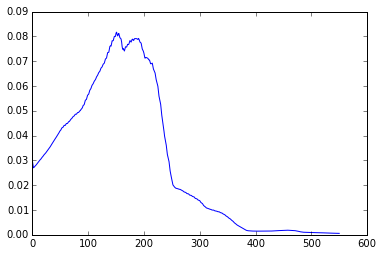

In [6]:
plt.plot(data.spectra[0].R0);

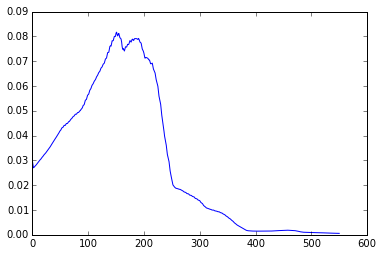

In [7]:
plt.plot(data.spectra[0].R0DP);

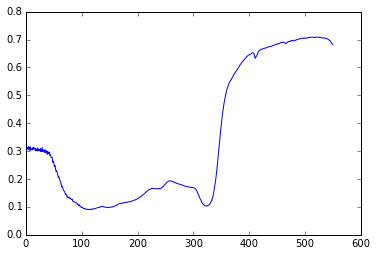

In [8]:
plt.plot(data.spectra[0].substrater);

In [9]:
data.sambuca.dtype.names

('DISTANCES',
 'OPTI_PARAMS',
 'INPUT_PARAMS',
 'IMAGESPECTRA',
 'INPUT_SPECTRA',
 'INPUTR',
 'INPUT_SIOP',
 'WGOSW')

In [10]:
data.sambuca.input_spectra[0].dtype.names

('WL',
 'AWATER',
 'BBWATER',
 'APHY_STAR',
 'ACDOM_STAR',
 'ATR_STAR',
 'BBPH_STAR',
 'BBTR_STAR',
 'CALCULATE_SIOPS',
 'SUBSTRATER')

In [11]:
data.sambuca.input_params[0].dtype.names

('THETA_AIR', 'LAMBDA0CDOM', 'LAMBDA0TR', 'LAMBDA0X')

# Parameters in ZZ

In [12]:
type(data.zz)

numpy.ndarray

In [13]:
len(data.zz)

15

#Substrate Extraction

In [14]:
data.sambuca.inputr[0].dtype.names

('N_SPECTRA', 'SUBS_Z', 'SPECTRA', 'NAMES', 'INDEX')

In [15]:
spectra = data.sambuca.inputr[0].spectra[0]
indicies = data.sambuca.inputr[0].index[0]
substrate1 = spectra[indicies[0]]

In [16]:
data.sambuca.inputr[0].spectra[0][:,0].shape

(551,)

In [17]:
len(data.sambuca.inputr[0].index)

1

#Error data

In [18]:
def print_error_data(ed):
    print("a: {}".format(ed.error_a))
    print("af: {}".format(ed.error_af))
    print("f: {}".format(ed.error_f))
    print("lsq: {}".format(ed.lsq))
    plt.plot(ed.rrs, 'b', label='rrs')
    plt.plot(ed.realrrs, 'g', label='realrrs')
    #plt.plot(ed.noiserrs, 'r', label='noiserrs')
    plt.legend()
    plt.ylim(0, 1.3)
    plt.show()

In [19]:
noise_data = readsav('../../sambuca/tests/data/noise_error_data.sav')
noise_data.keys()

dict_keys(['error_f', 'error_af', 'error_a', 'rrs', 'realrrs', 'lsq', 'noiserrs'])

In [20]:
noise_data.realrrs

array([ 0.0015525 ,  0.0014475 ,  0.00140675,  0.00136575,  0.001325  ,
        0.00129125,  0.0012575 ,  0.0012325 ,  0.0012075 ,  0.0011825 ,
        0.00115625,  0.00113   ,  0.00112325,  0.00111675,  0.00111   ,
        0.0011075 ,  0.001105  ,  0.001115  ,  0.001125  ,  0.001135  ,
        0.00116   ,  0.001185  ,  0.00118825,  0.00119175,  0.001195  ,
        0.0012    ,  0.001205  ,  0.00121575,  0.00122675,  0.0012375 ,
        0.00124875,  0.00126   ,  0.00128175,  0.00130325,  0.001325  ,
        0.0013875 ,  0.00145   ,  0.00149575,  0.00154175,  0.0015875 ,
        0.00166375,  0.00174   ,  0.00178575,  0.00183175,  0.0018775 ,
        0.00197625,  0.002075  ,  0.00215175,  0.00222825,  0.002305  ,
        0.00236375,  0.0024225 ,  0.00241675,  0.00241075,  0.002405  ,
        0.00239875,  0.0023925 ,  0.00241075,  0.00242925,  0.0024475 ,
        0.00248   ,  0.0025125 ,  0.0025175 ,  0.0025225 ,  0.0025275 ,
        0.00253875,  0.00255   ,  0.00258325,  0.00261675,  0.00

a: 0.9755970024830055
af: 0.08708689457115347
f: 0.0892652338511777
lsq: 5.897183601134045


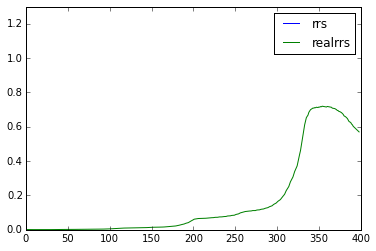

In [21]:
print_error_data(noise_data)

In [22]:
no_noise_data = readsav('../../sambuca/tests/data/no_noise_error_data.sav')
no_noise_data.keys()

dict_keys(['error_f', 'error_af', 'error_a', 'rrs', 'realrrs', 'lsq', 'noiserrs'])

a: 0.9755970024855829
af: 0.08708689457246128
f: 0.0892652338522824
lsq: 5.897183601134045


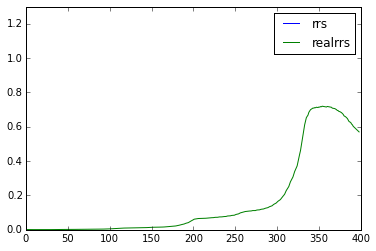

In [23]:
print_error_data(no_noise_data)

In [24]:
realrrs = noise_data.realrrs
rrs = noise_data.rrs
expected_lsq = noise_data.lsq
lsq = np.power(np.sum(np.power(realrrs - rrs, 2)), 0.5)
lsq_np = np.linalg.norm(realrrs - rrs)
print(expected_lsq, lsq, lsq_np)

5.89718360113 5.89718335694 5.89718


In [25]:
f_val = np.power( np.sum( np.power( realrrs - rrs, 2)), 0.5) / np.sum(realrrs)
f_val_np = np.linalg.norm(realrrs - rrs) / np.sum(realrrs)
f_val_3 = lsq_np / realrrs.sum()
print(f_val, f_val_np, f_val_3)

0.0892652352876 0.0892652 0.0892652


In [26]:
observed_rrs = realrrs
modelled_rrs = rrs
botline1 = np.power(np.sum(np.power(observed_rrs, 2)), 0.5)
botline2 = np.power(np.sum(np.power(modelled_rrs, 2)), 0.5)
botline1_np = np.linalg.norm(observed_rrs)
botline2_np = np.linalg.norm(modelled_rrs)

print(botline1, botline1_np)
print(botline2, botline2_np)

5.89882584866 5.89883
0.00293011898102 0.00293012
